In [ ]:
!pip3 install seaborn

In [11]:
# ## Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [12]:
# ## Step 2: Load the Dataset
file_path = "data/VNAT_Dataframe_release_1.csv"  # Update with the correct path
data = pd.read_csv(file_path)

In [13]:
data.head()

,Unnamed: 0.1,Unnamed: 0,connection,timestamps,sizes,directions,file_names
0,0,0,"('10.123.1.2', 1195, '10.123.1.1', 1195, 17)","[1563289706.330096, 1563289706.330207, 1563289...","[120, 88, 120, 88, 120, 88, 120, 120, 152, 120...","[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...",vpn_youtube_capture2.pcap
1,1,0,"('10.113.1.2', 22924, '10.115.1.2', 53, 17)","[1561391908.523659, 1561391908.524042]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
2,2,1,"('10.113.1.2', 53065, '10.115.1.2', 53, 17)","[1561391908.523706, 1561391908.524059]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap
3,3,2,"('10.113.1.150', 39816, '10.115.1.123', 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60, 60, 52, 73, 52, 73, 52, 1378, 222, 52, 13...","[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",nonvpn_sftp_newcapture1.pcap
4,4,3,"('10.115.1.2', 6589, '10.113.1.2', 53, 17)","[1561391908.594887, 1561391908.595301]","[51, 102]","[1, 0]",nonvpn_sftp_newcapture1.pcap


### Preprocessing: convert string array to float

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33711 entries, 0 to 33710
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  33711 non-null  int64 
 1   Unnamed: 0    33711 non-null  int64 
 2   connection    33711 non-null  object
 3   timestamps    33711 non-null  object
 4   sizes         33711 non-null  object
 5   directions    33711 non-null  object
 6   file_names    33711 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.8+ MB


In [15]:
def get_float(str_array):
    # Remove brackets and split the string by commas
    cleaned_string = str_array.strip("[]")  # Remove [ and ]
    string_list = cleaned_string.split(",")    # Split by commas

    # Convert to a NumPy array of floats
    float_array = np.array(string_list, dtype=float)
    return float_array 

for field in ["timestamps", "sizes", "directions"]:
    print(field)
    data[field] = data[field].apply(lambda x:  get_float(x))
    

timestamps
sizes
directions


In [16]:
data.head()

,Unnamed: 0.1,Unnamed: 0,connection,timestamps,sizes,directions,file_names
0,0,0,"('10.123.1.2', 1195, '10.123.1.1', 1195, 17)","[1563289706.330096, 1563289706.330207, 1563289...","[120.0, 88.0, 120.0, 88.0, 120.0, 88.0, 120.0,...","[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",vpn_youtube_capture2.pcap
1,1,0,"('10.113.1.2', 22924, '10.115.1.2', 53, 17)","[1561391908.523659, 1561391908.524042]","[63.0, 79.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap
2,2,1,"('10.113.1.2', 53065, '10.115.1.2', 53, 17)","[1561391908.523706, 1561391908.524059]","[63.0, 63.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap
3,3,2,"('10.113.1.150', 39816, '10.115.1.123', 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60.0, 60.0, 52.0, 73.0, 52.0, 73.0, 52.0, 137...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",nonvpn_sftp_newcapture1.pcap
4,4,3,"('10.115.1.2', 6589, '10.113.1.2', 53, 17)","[1561391908.594887, 1561391908.595301]","[51.0, 102.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap


In [17]:
# Remove the column 'Unnamed: 0.1' from the DataFrame
data = data.drop(columns=["Unnamed: 0.1"])

In [18]:
data.head()

,Unnamed: 0,connection,timestamps,sizes,directions,file_names
0,0,"('10.123.1.2', 1195, '10.123.1.1', 1195, 17)","[1563289706.330096, 1563289706.330207, 1563289...","[120.0, 88.0, 120.0, 88.0, 120.0, 88.0, 120.0,...","[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",vpn_youtube_capture2.pcap
1,0,"('10.113.1.2', 22924, '10.115.1.2', 53, 17)","[1561391908.523659, 1561391908.524042]","[63.0, 79.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap
2,1,"('10.113.1.2', 53065, '10.115.1.2', 53, 17)","[1561391908.523706, 1561391908.524059]","[63.0, 63.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap
3,2,"('10.113.1.150', 39816, '10.115.1.123', 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60.0, 60.0, 52.0, 73.0, 52.0, 73.0, 52.0, 137...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",nonvpn_sftp_newcapture1.pcap
4,3,"('10.115.1.2', 6589, '10.113.1.2', 53, 17)","[1561391908.594887, 1561391908.595301]","[51.0, 102.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap


## Description
The dataset contains detailed logs of network connections extracted from a PCAP file. Each row represents a unique connection with the following columns:

- Unnamed: 0: Index of the row (IGNORE)
- connection: A tuple describing the connection (source IP, source port, destination IP, destination port, protocol).
- timestamps: A list of timestamps indicating when packets for the connection were captured.
- sizes: A list of packet sizes (in bytes) for the connection.
- directions: A list indicating packet directions (1 for source-to-destination, 0 for destination-to-source).
- file_names: The name of the PCAP file from which the data was extracted.

In [19]:
## Label extraction: Extract label from the filename
label_col = "label"
data[label_col] = data["file_names"].apply(lambda x: '_'.join(x.split('_')[:2]))            # extract 1st & 2nd _seperated values from each file_name, & then join them back using _

# ### Drop Classes with Less Than 5 Instances
class_counts = data[label_col].value_counts()                                               # generate series of class_count
print(class_counts)
data = data[data[label_col].isin(class_counts[class_counts > 5].index)]

le = LabelEncoder()
data["label_encoded"] = le.fit_transform(data["label"])

label
nonvpn_ssh           13558
nonvpn_scp           12843
nonvpn_rsync          1911
nonvpn_sftp           1666
nonvpn_skype-chat     1244
nonvpn_vimeo          1217
nonvpn_youtube         338
nonvpn_voip            318
vpn_voip               299
nonvpn_netflix         204
vpn_skype-chat          57
nonvpn_rdp              33
vpn_ssh                  5
vpn_rsync                4
vpn_sftp                 4
vpn_youtube              3
vpn_rdp                  3
vpn_scp                  2
vpn_netflix              1
vpn_vimeo                1
Name: count, dtype: int64


In [25]:
data.head(5)

,Unnamed: 0,connection,timestamps,sizes,directions,file_names,label,label_encoded
1,0,"('10.113.1.2', 22924, '10.115.1.2', 53, 17)","[1561391908.523659, 1561391908.524042]","[63.0, 79.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap,nonvpn_sftp,4
2,1,"('10.113.1.2', 53065, '10.115.1.2', 53, 17)","[1561391908.523706, 1561391908.524059]","[63.0, 63.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap,nonvpn_sftp,4
3,2,"('10.113.1.150', 39816, '10.115.1.123', 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60.0, 60.0, 52.0, 73.0, 52.0, 73.0, 52.0, 137...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",nonvpn_sftp_newcapture1.pcap,nonvpn_sftp,4
4,3,"('10.115.1.2', 6589, '10.113.1.2', 53, 17)","[1561391908.594887, 1561391908.595301]","[51.0, 102.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap,nonvpn_sftp,4
5,4,"('10.115.1.2', 7384, '10.113.1.2', 53, 17)","[1561391908.595835, 1561391908.596233]","[63.0, 79.0]","[1.0, 0.0]",nonvpn_sftp_newcapture1.pcap,nonvpn_sftp,4


In [22]:
# Mapping of labels to numbers
print(dict(zip(le.classes_, range(len(le.classes_)))))

{'nonvpn_netflix': 0, 'nonvpn_rdp': 1, 'nonvpn_rsync': 2, 'nonvpn_scp': 3, 'nonvpn_sftp': 4, 'nonvpn_skype-chat': 5, 'nonvpn_ssh': 6, 'nonvpn_vimeo': 7, 'nonvpn_voip': 8, 'nonvpn_youtube': 9, 'vpn_skype-chat': 10, 'vpn_voip': 11}


In [23]:
data["label"].value_counts()

label
nonvpn_ssh           13558
nonvpn_scp           12843
nonvpn_rsync          1911
nonvpn_sftp           1666
nonvpn_skype-chat     1244
nonvpn_vimeo          1217
nonvpn_youtube         338
nonvpn_voip            318
vpn_voip               299
nonvpn_netflix         204
vpn_skype-chat          57
nonvpn_rdp              33
Name: count, dtype: int64

## Feature Extraction

In [ ]:
data = data.drop(columns=["file_names"])

In [39]:
print(data["sizes"].head(5))

# Check the data type of each entry in the 'sizes' column
print(data["sizes"].apply(type).value_counts())

sizes_example = data.loc[3, "directions"]
print(sizes_example)

print(len(sizes_example))

1                                         [63.0, 79.0]
2                                         [63.0, 63.0]
3    [60.0, 60.0, 52.0, 73.0, 52.0, 73.0, 52.0, 137...
4                                        [51.0, 102.0]
5                                         [63.0, 79.0]
Name: sizes, dtype: object
sizes
<class 'numpy.ndarray'>    33688
Name: count, dtype: int64
[1. 0. 1. ... 0. 0. 1.]
2002346


In [45]:
def get_avg(x):
    return np.mean(x)

def get_std(x):
    return np.std(x)

def get_sum(x):
    return np.sum(x)

def get_duration(timestamps):
    return timestamps[-1] - timestamps[0]

def get_total_packets(sizes):
    return len(sizes)

def get_IAT(timestamps):
    if len(timestamps) > 1:
        return np.diff(timestamps)
    return []           # No IAT for single packet


def get_mean_IAT(timestamps):
    iat = get_IAT(timestamps)
    return np.mean(iat)

def get_std_dev_IAT(timestamps):
    iat = get_IAT(timestamps)
    return np.std(iat)


## Get other features
### Packet-level: avg, std packet sizes
data["avg_pkt_size"] = data["sizes"].apply(get_avg)
data["stddev_pkt_size"] = data["sizes"].apply(get_std)
data["total_size"] = data["sizes"].apply(get_sum)



### Flow duration, total data, total pkts
data["flow_duration"] = data["timestamps"].apply(get_duration)
data["total_packets"] = data["sizes"].apply(get_total_packets)



### Intra-flow: mean and std of inter-arrival time or relative variance
data["mean_IAT"] = data["timestamps"].apply(get_mean_IAT)
data["stddev_IAT"] = data["timestamps"].apply(get_std_dev_IAT)

data.head(4)

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret 

,Unnamed: 0,connection,timestamps,sizes,directions,label,label_encoded,avg_pkt_size,std_dev_pkt_size,total_size,flow_duration,total_packets,mean_IAT,std_dev_IAT,stddev_pkt_size,stddev_IAT
1,0,"('10.113.1.2', 22924, '10.115.1.2', 53, 17)","[1561391908.523659, 1561391908.524042]","[63.0, 79.0]","[1.0, 0.0]",nonvpn_sftp,4,71.000000,8.000000,1.420000e+02,0.000383,2,0.000383,0.000000,8.000000,0.000000
2,1,"('10.113.1.2', 53065, '10.115.1.2', 53, 17)","[1561391908.523706, 1561391908.524059]","[63.0, 63.0]","[1.0, 0.0]",nonvpn_sftp,4,63.000000,0.000000,1.260000e+02,0.000353,2,0.000353,0.000000,0.000000,0.000000
3,2,"('10.113.1.150', 39816, '10.115.1.123', 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60.0, 60.0, 52.0, 73.0, 52.0, 73.0, 52.0, 137...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",nonvpn_sftp,4,912.335826,630.709083,1.826812e+09,473.359046,2002346,0.000236,0.080703,630.709083,0.080703
4,3,"('10.115.1.2', 6589, '10.113.1.2', 53, 17)","[1561391908.594887, 1561391908.595301]","[51.0, 102.0]","[1.0, 0.0]",nonvpn_sftp,4,76.500000,25.500000,1.530000e+02,0.000414,2,0.000414,0.000000,25.500000,0.000000


In [46]:
#### Feature Selection
feature_cols = ["avg_pkt_size", "stddev_pkt_size", "total_size", "flow_duration", "mean_IAT", "stddev_IAT"]  # Adjust as needed

### Drop values with no data
data_tmp = data.dropna()
features = data_tmp[feature_cols]
labels = data_tmp["label_encoded"]

In [47]:
# ## Step 4: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# ## Step 5: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [48]:
### ## Step 6: Train a Model
# Using Random Forest as an example
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
# ## Step 7: Evaluate the Model
y_pred = clf.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
                   precision    recall  f1-score   support

   nonvpn_netflix       0.78      0.53      0.63        58
       nonvpn_rdp       1.00      0.45      0.62        11
     nonvpn_rsync       0.50      0.01      0.02       553
       nonvpn_scp       0.79      1.00      0.88      3938
      nonvpn_sftp       0.69      0.02      0.04       486
nonvpn_skype-chat       0.99      0.97      0.98       377
       nonvpn_ssh       1.00      1.00      1.00      4028
     nonvpn_vimeo       0.89      0.95      0.92       368
      nonvpn_voip       1.00      0.98      0.99        81
   nonvpn_youtube       0.77      0.77      0.77        92
   vpn_skype-chat       1.00      1.00      1.00        20
         vpn_voip       1.00      1.00      1.00        87

         accuracy                           0.89     10099
        macro avg       0.87      0.72      0.74     10099
     weighted avg       0.87      0.89      0.85     10099



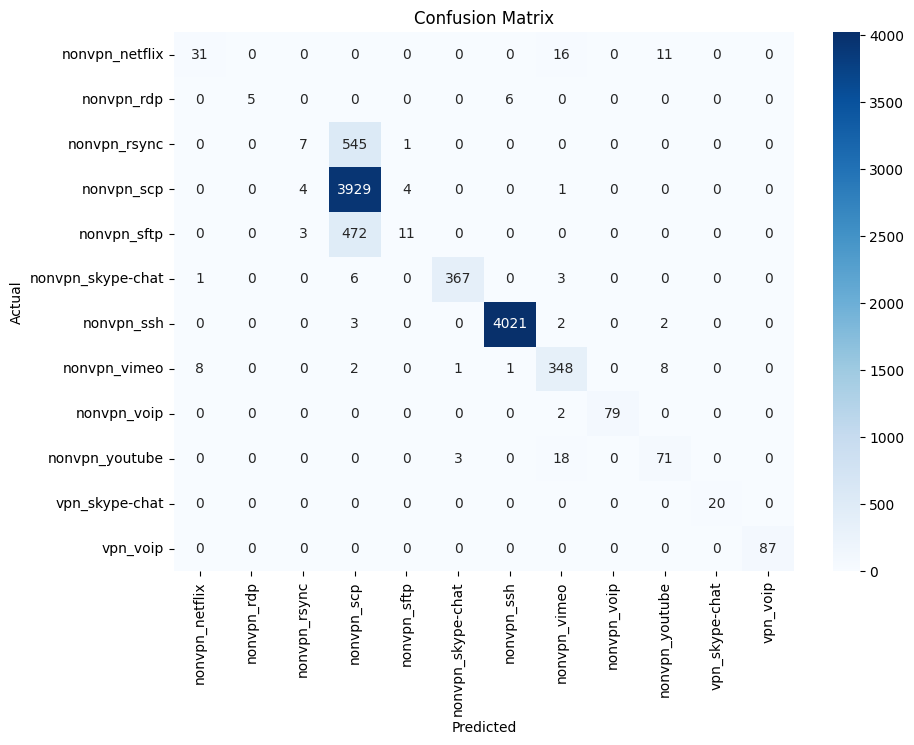

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

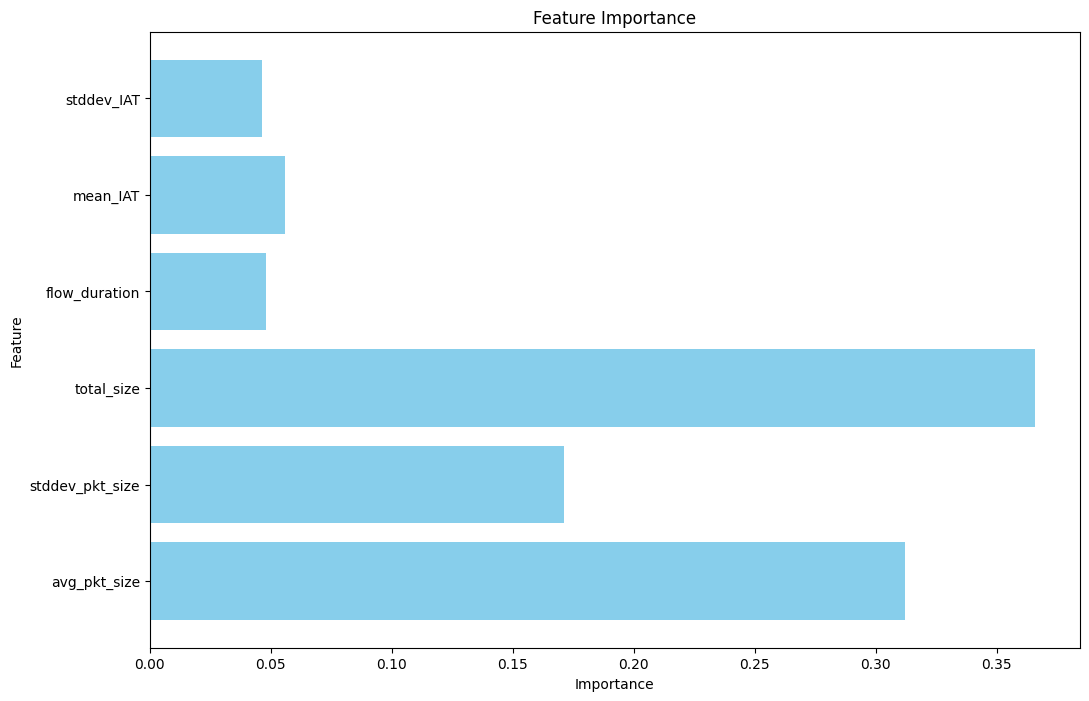

In [51]:
# ## Step 8: Feature Importance
# Plot feature importances
importances = clf.feature_importances_
feature_names = features.columns

plt.figure(figsize=(12, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


In [ ]:
## Can you think of methods to improve the accuracy? 